캐글 PUBG 컴피티션 https://www.kaggle.com/deffro/eda-is-fun 커널 공부하기.

목차
- The Killers
- The Runners
- The Drivers
- The Swimmers
- The Healers
- Solos, Duos and Squads
- Correlation
- Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 불러오기
train = pd.read_csv('./DataSet/train_V2.csv')

In [3]:
#데이터 정보 보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [4]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## The Killers

In [5]:
print('평균 kill은 {:.4f} 명이고, 99%의 유저들이 {} 보다 같거나 적은 kill 기록을 가지고 있었다, 반면에 최대 킬 기록은 {} kill 이다.'.format(train['kills'].mean(), train['kills'].quantile(0.99), train['kills'].max()))

평균 kill은 0.9248 명이고, 99%의 유저들이 7.0 보다 같거나 적은 kill 기록을 가지고 있었다, 반면에 최대 킬 기록은 72 kill 이다.


시각화를 해보자.

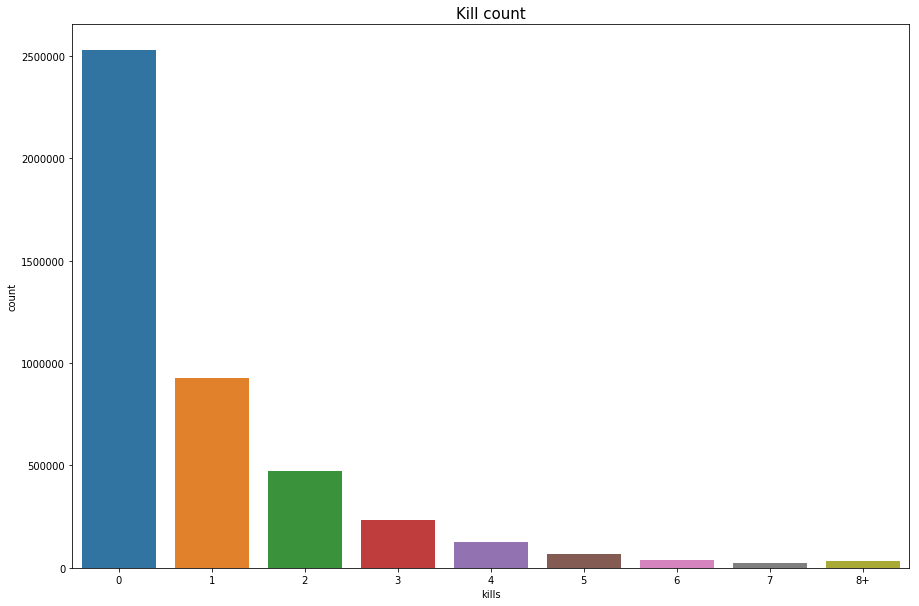

In [6]:
data = train.copy()
#kill 중에 99% 이상은 8+로 값을 바꾼다.
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
#그냥 str으로 변환 후 값에 따라 정렬한 값으로 countplot
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill count', fontsize=15)
plt.show()

대부분의 사람들이 0킬을 기록했는데, 최소한 한발은 맞췄을까?

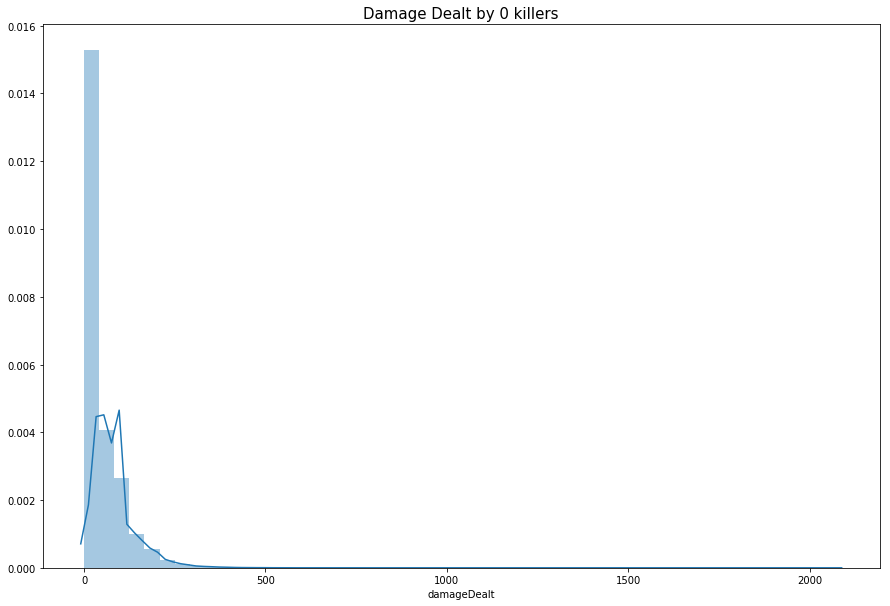

In [7]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers', fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

대부분의 사람들이 대미지 1도 못넣었다. 예외들을 살펴보자.

In [8]:
print('{}명의 플레이어({:.4f}%)들은 1킬도 안하고 치킨을 먹었다.'.format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt']==0].copy()
print('{}명의 플레이어({:.4f}%)들은 데미지를 1도 안넣고 치킨을 먹었다.'.format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666명의 플레이어(0.3748%)들은 1킬도 안하고 치킨을 먹었다.
4770명의 플레이어(0.1073%)들은 데미지를 1도 안넣고 치킨을 먹었다.


치킨 먹는 비율 대 킬에 대해서 시각화를 해보자.

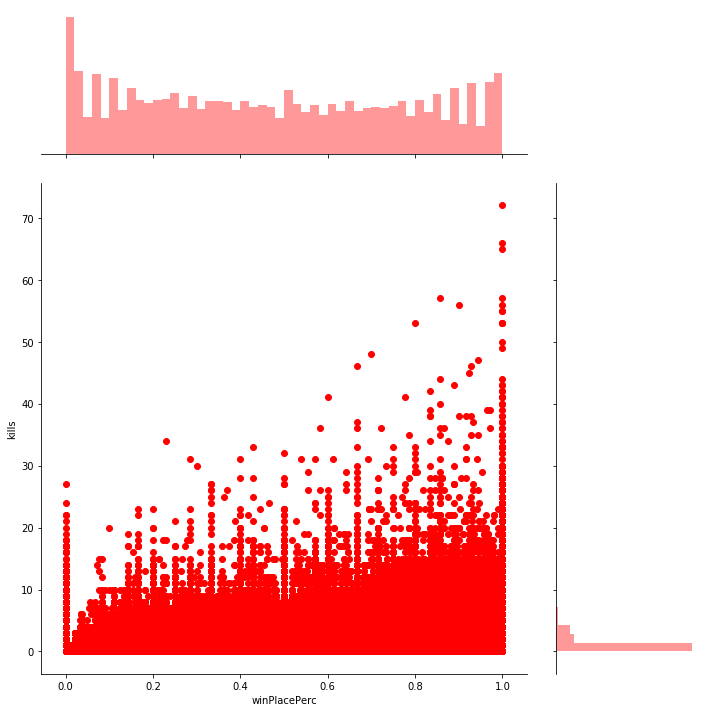

In [9]:
sns.jointplot(x='winPlacePerc', y = 'kills', data=train, height=10, ratio=3, color='r')
plt.show()

보이는 것처럼 킬이 승률과 상관관계가 있음을 알 수 있다. 마지막으로 플레이어들을 0킬, 1~2킬, 3~5킬, 6~10킬, 10 +킬로 무리지어보자.

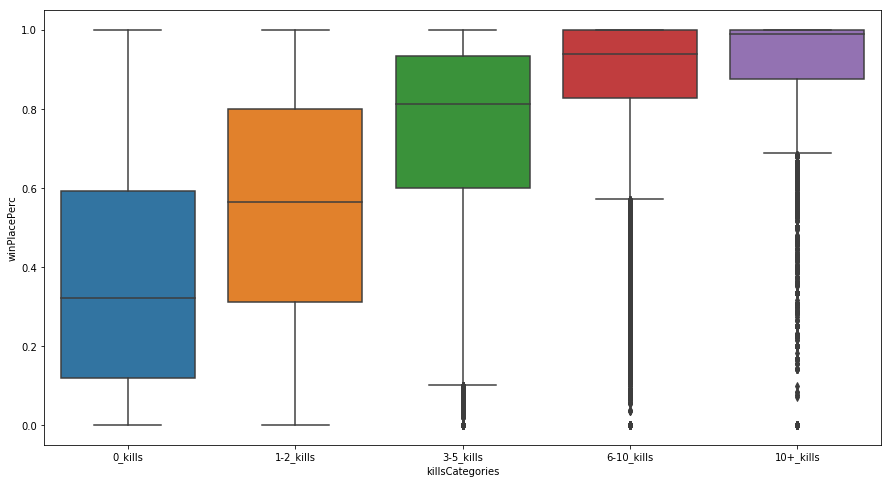

In [10]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1,0,2,5,10,60], labels=['0_kills', '1-2_kills',
                                                                        '3-5_kills','6-10_kills','10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x='killsCategories', y='winPlacePerc', data=kills)
plt.show()

확실히 킬이 많아질수록 승률 분포가 올라가긴한다.

## The Runners


In [11]:
print('플레이어들은 평균적으로 {:.1f}m 만큼 이동하고, 99%의 플레이어들은 {}m 보다는 적게 이동했다. 반면에 가장 많이 달린 사람은 {}m 만큼 이동했다.'.format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

플레이어들은 평균적으로 1154.2m 만큼 이동하고, 99%의 플레이어들은 4396.0m 보다는 적게 이동했다. 반면에 가장 많이 달린 사람은 25780.0m 만큼 이동했다.


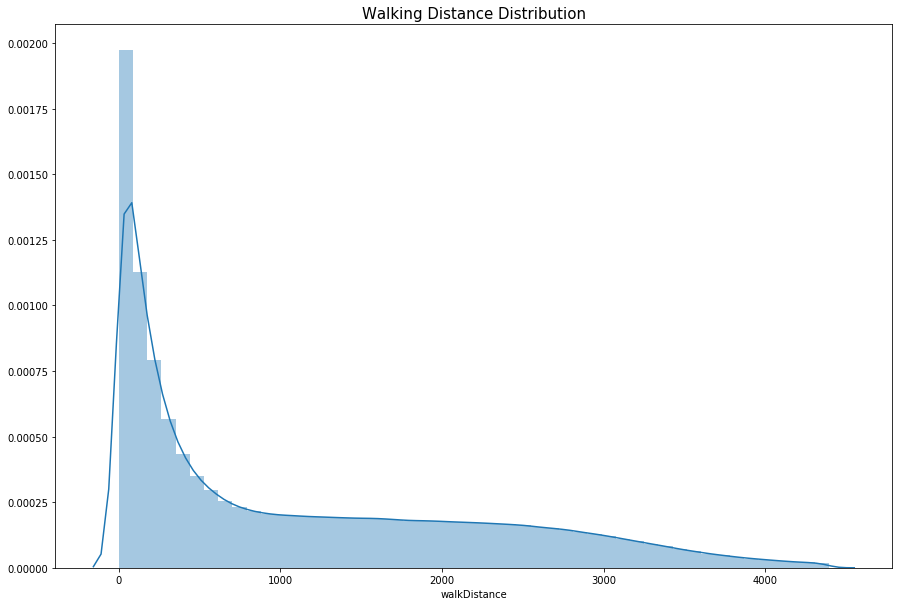

In [12]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title('Walking Distance Distribution', fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [13]:
print('{} 명의 플레이어({:.4f}%)들은 이동거리가 0 m 이다. 플레이어들이 내려오자마자 죽었거나, 탈주한 경우로 보인다. 중국 광고 매크로 일수도 있다고 한다.(1200시간 플레이한 친구 피셜)'.format(
    len(data[data['walkDistance']==0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

99603 명의 플레이어(2.0329%)들은 이동거리가 0 m 이다. 플레이어들이 내려오자마자 죽었거나, 탈주한 경우로 보인다. 중국 광고 매크로 일수도 있다고 한다.(1200시간 플레이한 친구 피셜)


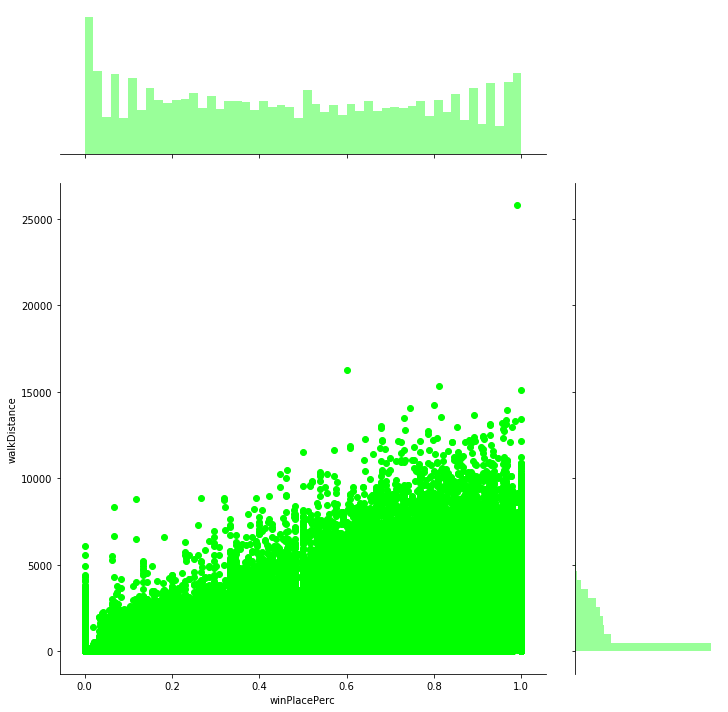

In [14]:
sns.jointplot(x='winPlacePerc', y = 'walkDistance', data = train, height=10, ratio=3, color='lime')
plt.show()

이동거리도 승률에 높은 상관관계를 보임을 알 수 있다.

## The Drivers 

In [15]:
print('평균적으로 플레이어들은 {:.1f}m 만큼 차량으로 이동하고, 99%의 유저들은 {}m 보다 같거나 적게 운전한다. 반면에 가장 많이 운전한 플레이어는 {}m 만큼 이동했다.'.format(
    train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

평균적으로 플레이어들은 606.1m 만큼 차량으로 이동하고, 99%의 유저들은 6966.0m 보다 같거나 적게 운전한다. 반면에 가장 많이 운전한 플레이어는 40710.0m 만큼 이동했다.


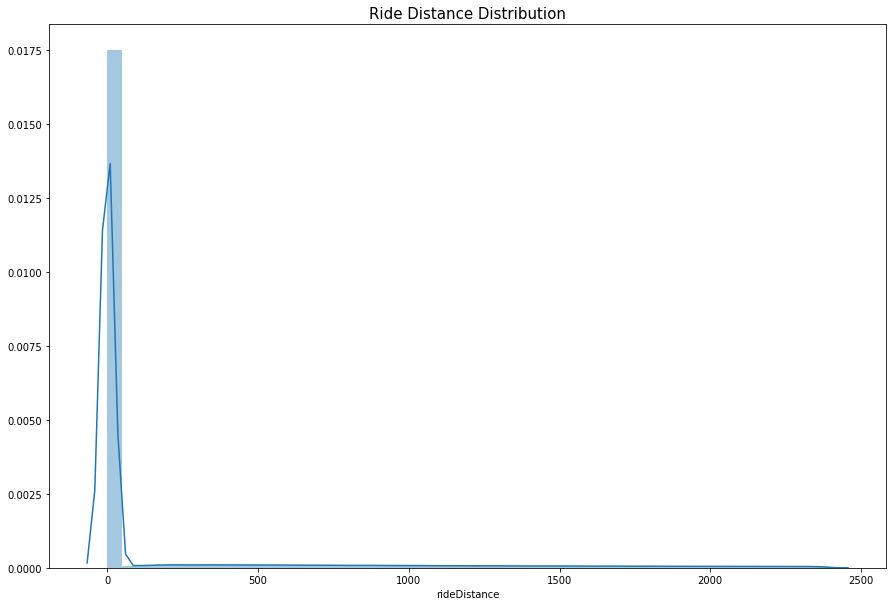

In [16]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title('Ride Distance Distribution', fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [19]:
print('{}명의 플레이어({:.4f}%)들은 0m 만큼 차량으로 이동했다. 이는 아직도 운전면허가 없는 사람들이 상당하다는 것을 보여준다.'.format(
    len(data[data['rideDistance'] == 0]), 100 * len(data1[data1['rideDistance']==0])/len(train)))

3309429명의 플레이어(23.1022%)들은 0m 만큼 차량으로 이동했다. 이는 아직도 운전면허가 없는 사람들이 상당하다는 것을 보여준다.


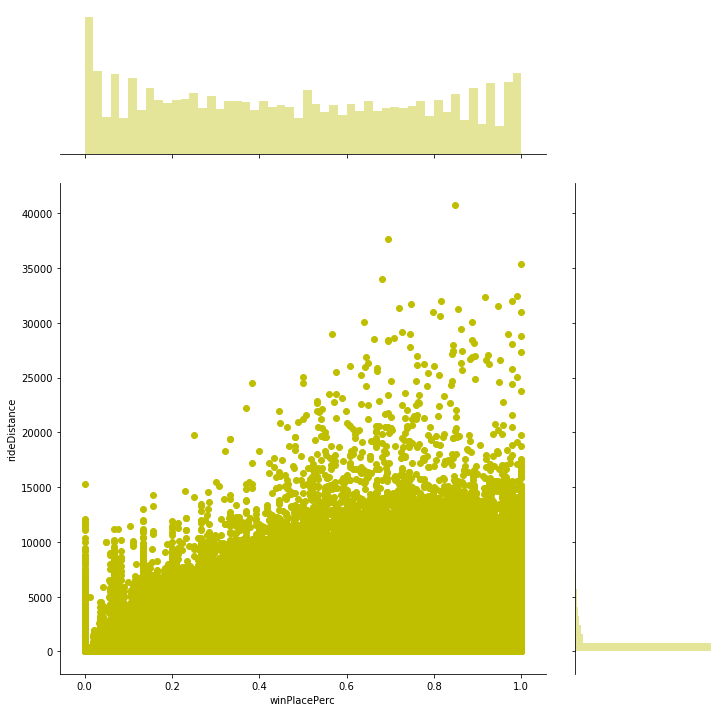

In [20]:
sns.jointplot(x = 'winPlacePerc', y='rideDistance', data = train, height=10, ratio=3, color='y')
plt.show()

운전한 거리는 킬, 달린 거리에 비해 승률과는 낮은 상관관계를 보여준다.

경험상 차량을 파괴하는건 플레이어에게 상당한 기술을 요하므로 한번 확인해보자.

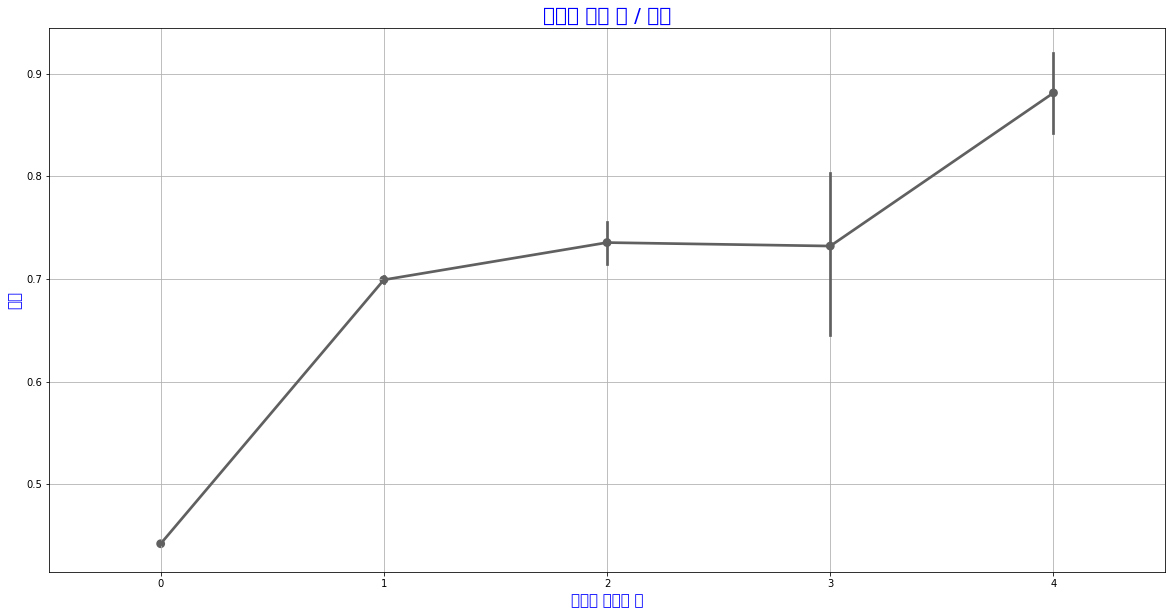

In [22]:
f, ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=data, color ='#606060', alpha=0.8)
plt.xlabel('파괴한 차량의 수', fontsize = 15, color='blue')
plt.ylabel('승률', fontsize=15, color = 'blue')
plt.title('파괴한 차량 수 / 승률',fontsize= 20, color='blue')
plt.grid()
plt.show()